## AMERICAN AIRLINES

In [1]:
import yfinance as yf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

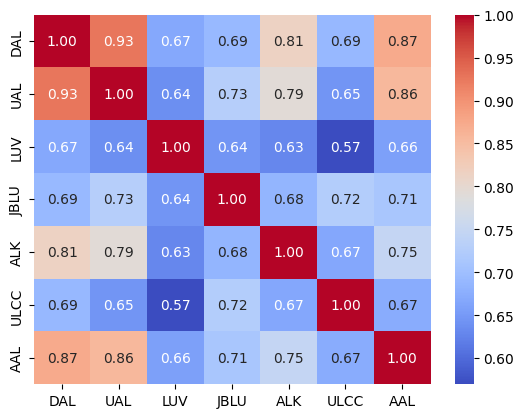

In [2]:
def correlation_heatmap(ticker_list):
    series = []
    valid = []

    for t in ticker_list:
        df = yf.Ticker(t).history(period="1y", interval="1d")
        if df.empty or "Close" not in df:
            continue
        r = np.log(df["Close"] / df["Close"].shift(1)).dropna()
        if not r.empty:
            series.append(r.rename(t))
            valid.append(t)

    if len(series) < 2:
        print("Not enough valid tickers/data to compute correlation.")
        return

    returns_df = pd.concat(series, axis=1).dropna()   # align on common dates
    corr = returns_df.corr()

    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",
                xticklabels=valid, yticklabels=valid)
    plt.show()
airline_tickers =  ["DAL","UAL","LUV","JBLU","ALK","ULCC",'AAL']
correlation_heatmap(airline_tickers)

## Qualitative Thesis

Given the lower interest rate environment consumer spending should increase, thus heading the next year vacation acitivty should increase. This would result in higher revenue for AA